In [1]:
def forward_prop(X,Y,b,W,reg):
    y_hat=np.dot(X,W)+np.transpose(b)
    m=X.shape[0]
    mse =1.0/m* np.sum(np.square((Y - y_hat)))
    Loss=mse+ reg*np.sum(W**2)
    cache={"y_hat":y_hat}
    return Loss,cache

In [2]:

def back_prop(W,X,Y,Y_hat,reg):
    m=Y.shape[0]
    dy_hat =1.0/m*2.0*(Y_hat-Y)
    dW =np.dot(X.T, dy_hat)+reg*W
    db=np.sum(dy_hat,axis=0)
    return dW,db

In [3]:
def accuracy(y_hat,y):
    y_hat = np.argmax(y_hat,axis=1)
    y= np.argmax(y,axis=1)
    accuracy=np.sum(y_hat==y)/y.size 
    return accuracy

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:

print('x_train:' , x_train.shape)
print('x_test:' , x_test.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image

x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))#shaping images into a vector Din=32x32x3
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-9
w1 = std*np.random.randn(Din, K)#initialization
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr #for the batch size whole dataset is considered

iterations =300
lr =0.01
lr_decay=0.999#learning rate is decreased in each iteration
reg =1e-8#regularization term which stops growth of weights
train_loss_history = []
test_loss_history=[]
train_acc_history = []
test_acc_history = []

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)#generating image
    rng.shuffle(indices)
    x_train=x_train[indices]
    y_train=y_train[indices]
    # Forward pass
    loss,cache=forward_prop(W=w1,b=b1,X=x_train,Y=y_train,reg=reg)
    train_loss_history.append(loss)
    y_hat=cache["y_hat"]

    train_acc=accuracy(y_hat,y_train)
    train_acc_history.append(train_acc)
    # Backward pass
    dw1,db1=back_prop(Y_hat=y_hat,W=w1,X=x_train,Y=y_train,reg=reg)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay
    
    test_loss,cache_test=forward_prop(W=w1,b=b1,X=x_test,Y=y_test,reg=reg)
    y_test_hat=cache_test["y_hat"]
    test_loss_history.append(test_loss)
    test_acc=accuracy(y_test_hat,y_test)
    test_acc_history.append(test_acc)
    if t%10==0:
        print("Epoch "+str(t+1)+"/"+str(iterations)+">>> trainig_loss: ",loss,">>training_accuracy: ",train_acc,">>testing_loss:",test_loss,">>>testing_accuracy:",test_acc)
# Printing accuracies and displaying w as images


x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
Epoch 1/300>>> trainig_loss:  1.0000000018998942 >>training_accuracy:  0.09488 >>testing_loss: 0.9614183587951687 >>>testing_accuracy: 0.2487
Epoch 11/300>>> trainig_loss:  0.8922137953292723 >>training_accuracy:  0.34134 >>testing_loss: 0.8875414510638088 >>>testing_accuracy: 0.3452
Epoch 21/300>>> trainig_loss:  0.8596856963247662 >>training_accuracy:  0.36454 >>testing_loss: 0.8570070741791531 >>>testing_accuracy: 0.3646
Epoch 31/300>>> trainig_loss:  0.8395702479314939 >>training_accuracy:  0.37426 >>testing_loss: 0.8379050623579828 >>>testing_accuracy: 0.3752
Epoch 41/300>>> trainig_loss:  0.826163268014908 >>training_accuracy:  0.38072 >>testing_loss: 0.8251627407989335 >>>testing_accuracy: 0.3811
Epoch 51/300>>> trainig_loss:  0.8169472453133391 >>training_accuracy:  0.38542 >>testing_loss: 0.8164282776819249 >>>testing_accuracy: 0.3857
Epoch 61/300>>> trainig_loss:  0.8104639454759758 >>training_acc

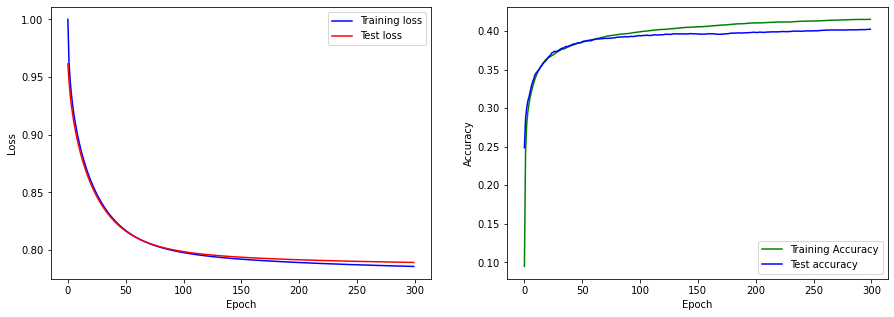

In [9]:

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(train_loss_history,'b')
ax[0].plot(test_loss_history,'r')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')  
ax[0].legend(['Training loss','Test loss'])

ax[1].plot(train_acc_history,'g')
ax[1].plot(test_acc_history,'b')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')  
ax[1].legend(['Training Accuracy','Test accuracy'])

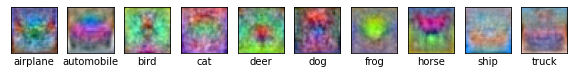

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    w = w1[:,i]
    wnormalized = (w-min(w))/max(w)
    wnormalized= wnormalized/max(wnormalized)
    plt.grid(False)
    plt.imshow(wnormalized.reshape((32,32,3)))
    plt.xlabel(classes[i])
plt.show()

In [11]:
np.save("train_loss_history_Q1",train_loss_history)
np.save("test_loss_history_Q1",test_loss_history)
np.save("train_acc_history_Q1",train_acc_history)
np.save("test_acc_history_Q1",test_acc_history)